In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/capstone-project-data/sample_submission.csv
/kaggle/input/capstone-project-data/train.csv
/kaggle/input/capstone-project-data/test.csv
/kaggle/input/d/contextaware/churnfall23/sample_submission.csv
/kaggle/input/d/contextaware/churnfall23/train.csv
/kaggle/input/d/contextaware/churnfall23/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

#Read train and test csv's into pandas dataframes
train=pd.read_csv("/kaggle/input/d/contextaware/churnfall23/train.csv")
test=pd.read_csv("/kaggle/input/d/contextaware/churnfall23/test.csv")

In [3]:
train.isnull().sum()

ID                  0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                5634 non-null   int64  
 1   customerID        5634 non-null   object 
 2   gender            5634 non-null   object 
 3   SeniorCitizen     5634 non-null   int64  
 4   Partner           5634 non-null   object 
 5   Dependents        5634 non-null   object 
 6   tenure            5634 non-null   int64  
 7   PhoneService      5634 non-null   object 
 8   MultipleLines     5634 non-null   object 
 9   InternetService   5634 non-null   object 
 10  OnlineSecurity    5634 non-null   object 
 11  OnlineBackup      5634 non-null   object 
 12  DeviceProtection  5634 non-null   object 
 13  TechSupport       5634 non-null   object 
 14  StreamingTV       5634 non-null   object 
 15  StreamingMovies   5634 non-null   object 
 16  Contract          5634 non-null   object 


In [5]:
train.Churn.value_counts()

Churn
0    4139
1    1495
Name: count, dtype: int64

### There are around 3 times as many 0 as 1 in the Churn column, resampling may be a good approach. Due to the small dataset size, upsampling will likely provide a better result than downsampling.

In [6]:

#splitting Churn off from train to y, then dropping it from X.
X=train
y=train.Churn
X.drop(['Churn'],inplace=True,axis=1)

### upsampling to balance Churn

In [7]:
Ximb, yimb = resample (X[y==1],
                        y[y==1],
                        replace=True,
                        n_samples=X[y==0].shape[0],
                        random_state=1)

In [8]:
Ximb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4139 entries, 3974 to 4996
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4139 non-null   int64  
 1   customerID        4139 non-null   object 
 2   gender            4139 non-null   object 
 3   SeniorCitizen     4139 non-null   int64  
 4   Partner           4139 non-null   object 
 5   Dependents        4139 non-null   object 
 6   tenure            4139 non-null   int64  
 7   PhoneService      4139 non-null   object 
 8   MultipleLines     4139 non-null   object 
 9   InternetService   4139 non-null   object 
 10  OnlineSecurity    4139 non-null   object 
 11  OnlineBackup      4139 non-null   object 
 12  DeviceProtection  4139 non-null   object 
 13  TechSupport       4139 non-null   object 
 14  StreamingTV       4139 non-null   object 
 15  StreamingMovies   4139 non-null   object 
 16  Contract          4139 non-null   object 
 1

In [9]:
#Add the extra rows into X and y, with a reindex
X=pd.concat([X,Ximb],ignore_index=True)
y=pd.concat([y,yimb],ignore_index=True)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9773 entries, 0 to 9772
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                9773 non-null   int64  
 1   customerID        9773 non-null   object 
 2   gender            9773 non-null   object 
 3   SeniorCitizen     9773 non-null   int64  
 4   Partner           9773 non-null   object 
 5   Dependents        9773 non-null   object 
 6   tenure            9773 non-null   int64  
 7   PhoneService      9773 non-null   object 
 8   MultipleLines     9773 non-null   object 
 9   InternetService   9773 non-null   object 
 10  OnlineSecurity    9773 non-null   object 
 11  OnlineBackup      9773 non-null   object 
 12  DeviceProtection  9773 non-null   object 
 13  TechSupport       9773 non-null   object 
 14  StreamingTV       9773 non-null   object 
 15  StreamingMovies   9773 non-null   object 
 16  Contract          9773 non-null   object 


In [11]:
y.value_counts()

Churn
1    5634
0    4139
Name: count, dtype: int64

### Churn isn't perfectly balanced, instead the resample got added to the original sample

### TotalCharges is an object type, but has numeric data. It can be forced to a numeric type.

In [12]:

X.TotalCharges=pd.to_numeric(X['TotalCharges'], errors='coerce')

test.TotalCharges=pd.to_numeric(test['TotalCharges'], errors='coerce')


In [13]:
X.isnull().sum()

ID                  0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
dtype: int64

### There are 8 null values in TotalCharges which were masked by the object type previously, they'll be imputed with a mean.

In [14]:
X.TotalCharges=X.TotalCharges.fillna(X.TotalCharges.mean())
test.TotalCharges=test.TotalCharges.fillna(test.TotalCharges.mean())

### The remaining object types will need to be enumerated

In [15]:
class_mapping={label:idx for idx, label in (enumerate(np.unique(X['gender'])))}
X['gender']=X['gender'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(X['Partner'])))}
X['Partner']=X['Partner'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(X['Dependents'])))}
X['Dependents']=X['Dependents'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(X['PhoneService'])))}
X['PhoneService']=X['PhoneService'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(X['MultipleLines'])))}
X['MultipleLines']=X['MultipleLines'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(X['InternetService'])))}
X['InternetService']=X['InternetService'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(X['OnlineSecurity'])))}
X['OnlineSecurity']=X['OnlineSecurity'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(X['OnlineBackup'])))}
X['OnlineBackup']=X['OnlineBackup'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(X['DeviceProtection'])))}
X['DeviceProtection']=X['DeviceProtection'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(X['TechSupport'])))}
X['TechSupport']=X['TechSupport'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(X['StreamingTV'])))}
X['StreamingTV']=X['StreamingTV'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(X['StreamingMovies'])))}
X['StreamingMovies']=X['StreamingMovies'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(X['Contract'])))}
X['Contract']=X['Contract'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(X['PaperlessBilling'])))}
X['PaperlessBilling']=X['PaperlessBilling'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(X['PaymentMethod'])))}
X['PaymentMethod']=X['PaymentMethod'].map(class_mapping)






class_mapping={label:idx for idx, label in (enumerate(np.unique(test['gender'])))}
test['gender']=test['gender'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(test['Partner'])))}
test['Partner']=test['Partner'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(test['Dependents'])))}
test['Dependents']=test['Dependents'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(test['PhoneService'])))}
test['PhoneService']=test['PhoneService'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(test['MultipleLines'])))}
test['MultipleLines']=test['MultipleLines'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(test['InternetService'])))}
test['InternetService']=test['InternetService'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(test['OnlineSecurity'])))}
test['OnlineSecurity']=test['OnlineSecurity'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(test['OnlineBackup'])))}
test['OnlineBackup']=test['OnlineBackup'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(test['DeviceProtection'])))}
test['DeviceProtection']=test['DeviceProtection'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(test['TechSupport'])))}
test['TechSupport']=test['TechSupport'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(test['StreamingTV'])))}
test['StreamingTV']=test['StreamingTV'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(test['StreamingMovies'])))}
test['StreamingMovies']=test['StreamingMovies'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(test['Contract'])))}
test['Contract']=test['Contract'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(test['PaperlessBilling'])))}
test['PaperlessBilling']=test['PaperlessBilling'].map(class_mapping)

class_mapping={label:idx for idx, label in (enumerate(np.unique(test['PaymentMethod'])))}
test['PaymentMethod']=test['PaymentMethod'].map(class_mapping)

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9773 entries, 0 to 9772
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                9773 non-null   int64  
 1   customerID        9773 non-null   object 
 2   gender            9773 non-null   int64  
 3   SeniorCitizen     9773 non-null   int64  
 4   Partner           9773 non-null   int64  
 5   Dependents        9773 non-null   int64  
 6   tenure            9773 non-null   int64  
 7   PhoneService      9773 non-null   int64  
 8   MultipleLines     9773 non-null   int64  
 9   InternetService   9773 non-null   int64  
 10  OnlineSecurity    9773 non-null   int64  
 11  OnlineBackup      9773 non-null   int64  
 12  DeviceProtection  9773 non-null   int64  
 13  TechSupport       9773 non-null   int64  
 14  StreamingTV       9773 non-null   int64  
 15  StreamingMovies   9773 non-null   int64  
 16  Contract          9773 non-null   int64  


In [17]:
X.describe()

,ID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,9773.000000,9773.000000,9773.000000,9773.000000,9773.000000,9773.000000,9773.000000,9773.000000,9773.000000,9773.000000,9773.000000,9773.000000,9773.000000,9773.000000,9773.00000,9773.000000,9773.000000,9773.000000,9773.000000,9773.000000
mean,3529.699376,0.499130,0.203520,0.438248,0.249667,26.632968,0.903919,0.978717,0.844981,0.623555,0.800368,0.798527,0.627648,0.976977,0.97534,0.457894,0.658242,1.661823,69.202573,2000.904659
std,2031.863423,0.500025,0.402636,0.496197,0.432843,23.741497,0.294717,0.950557,0.653100,0.842975,0.901375,0.900965,0.844792,0.922932,0.92289,0.741435,0.474323,0.995966,28.362806,2170.412972
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,18.400000,18.850000
25%,1789.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,48.350000,261.250000
50%,3528.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,2.000000,75.300000,1101.850000
75%,5316.000000,1.000000,0.000000,1.000000,0.000000,47.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.00000,1.000000,1.000000,2.000000,92.200000,3162.650000
max,7043.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,1.000000,3.000000,118.750000,8684.800000


### All data types are now numeric, except customerID which is irrelevant and will be dropped.

In [18]:
X.drop(['customerID'],inplace=True,axis=1)
test.drop(['customerID'],inplace=True,axis=1)


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'Partner'}>],
       [<Axes: title={'center': 'Dependents'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'PhoneService'}>,
        <Axes: title={'center': 'MultipleLines'}>],
       [<Axes: title={'center': 'InternetService'}>,
        <Axes: title={'center': 'OnlineSecurity'}>],
       [<Axes: title={'center': 'OnlineBackup'}>,
        <Axes: title={'center': 'DeviceProtection'}>],
       [<Axes: title={'center': 'TechSupport'}>,
        <Axes: title={'center': 'StreamingTV'}>],
       [<Axes: title={'center': 'StreamingMovies'}>,
        <Axes: title={'center': 'Contract'}>],
       [<Axes: title={'center': 'PaperlessBilling'}>,
        <Axes: title={'center': 'PaymentMethod'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dty

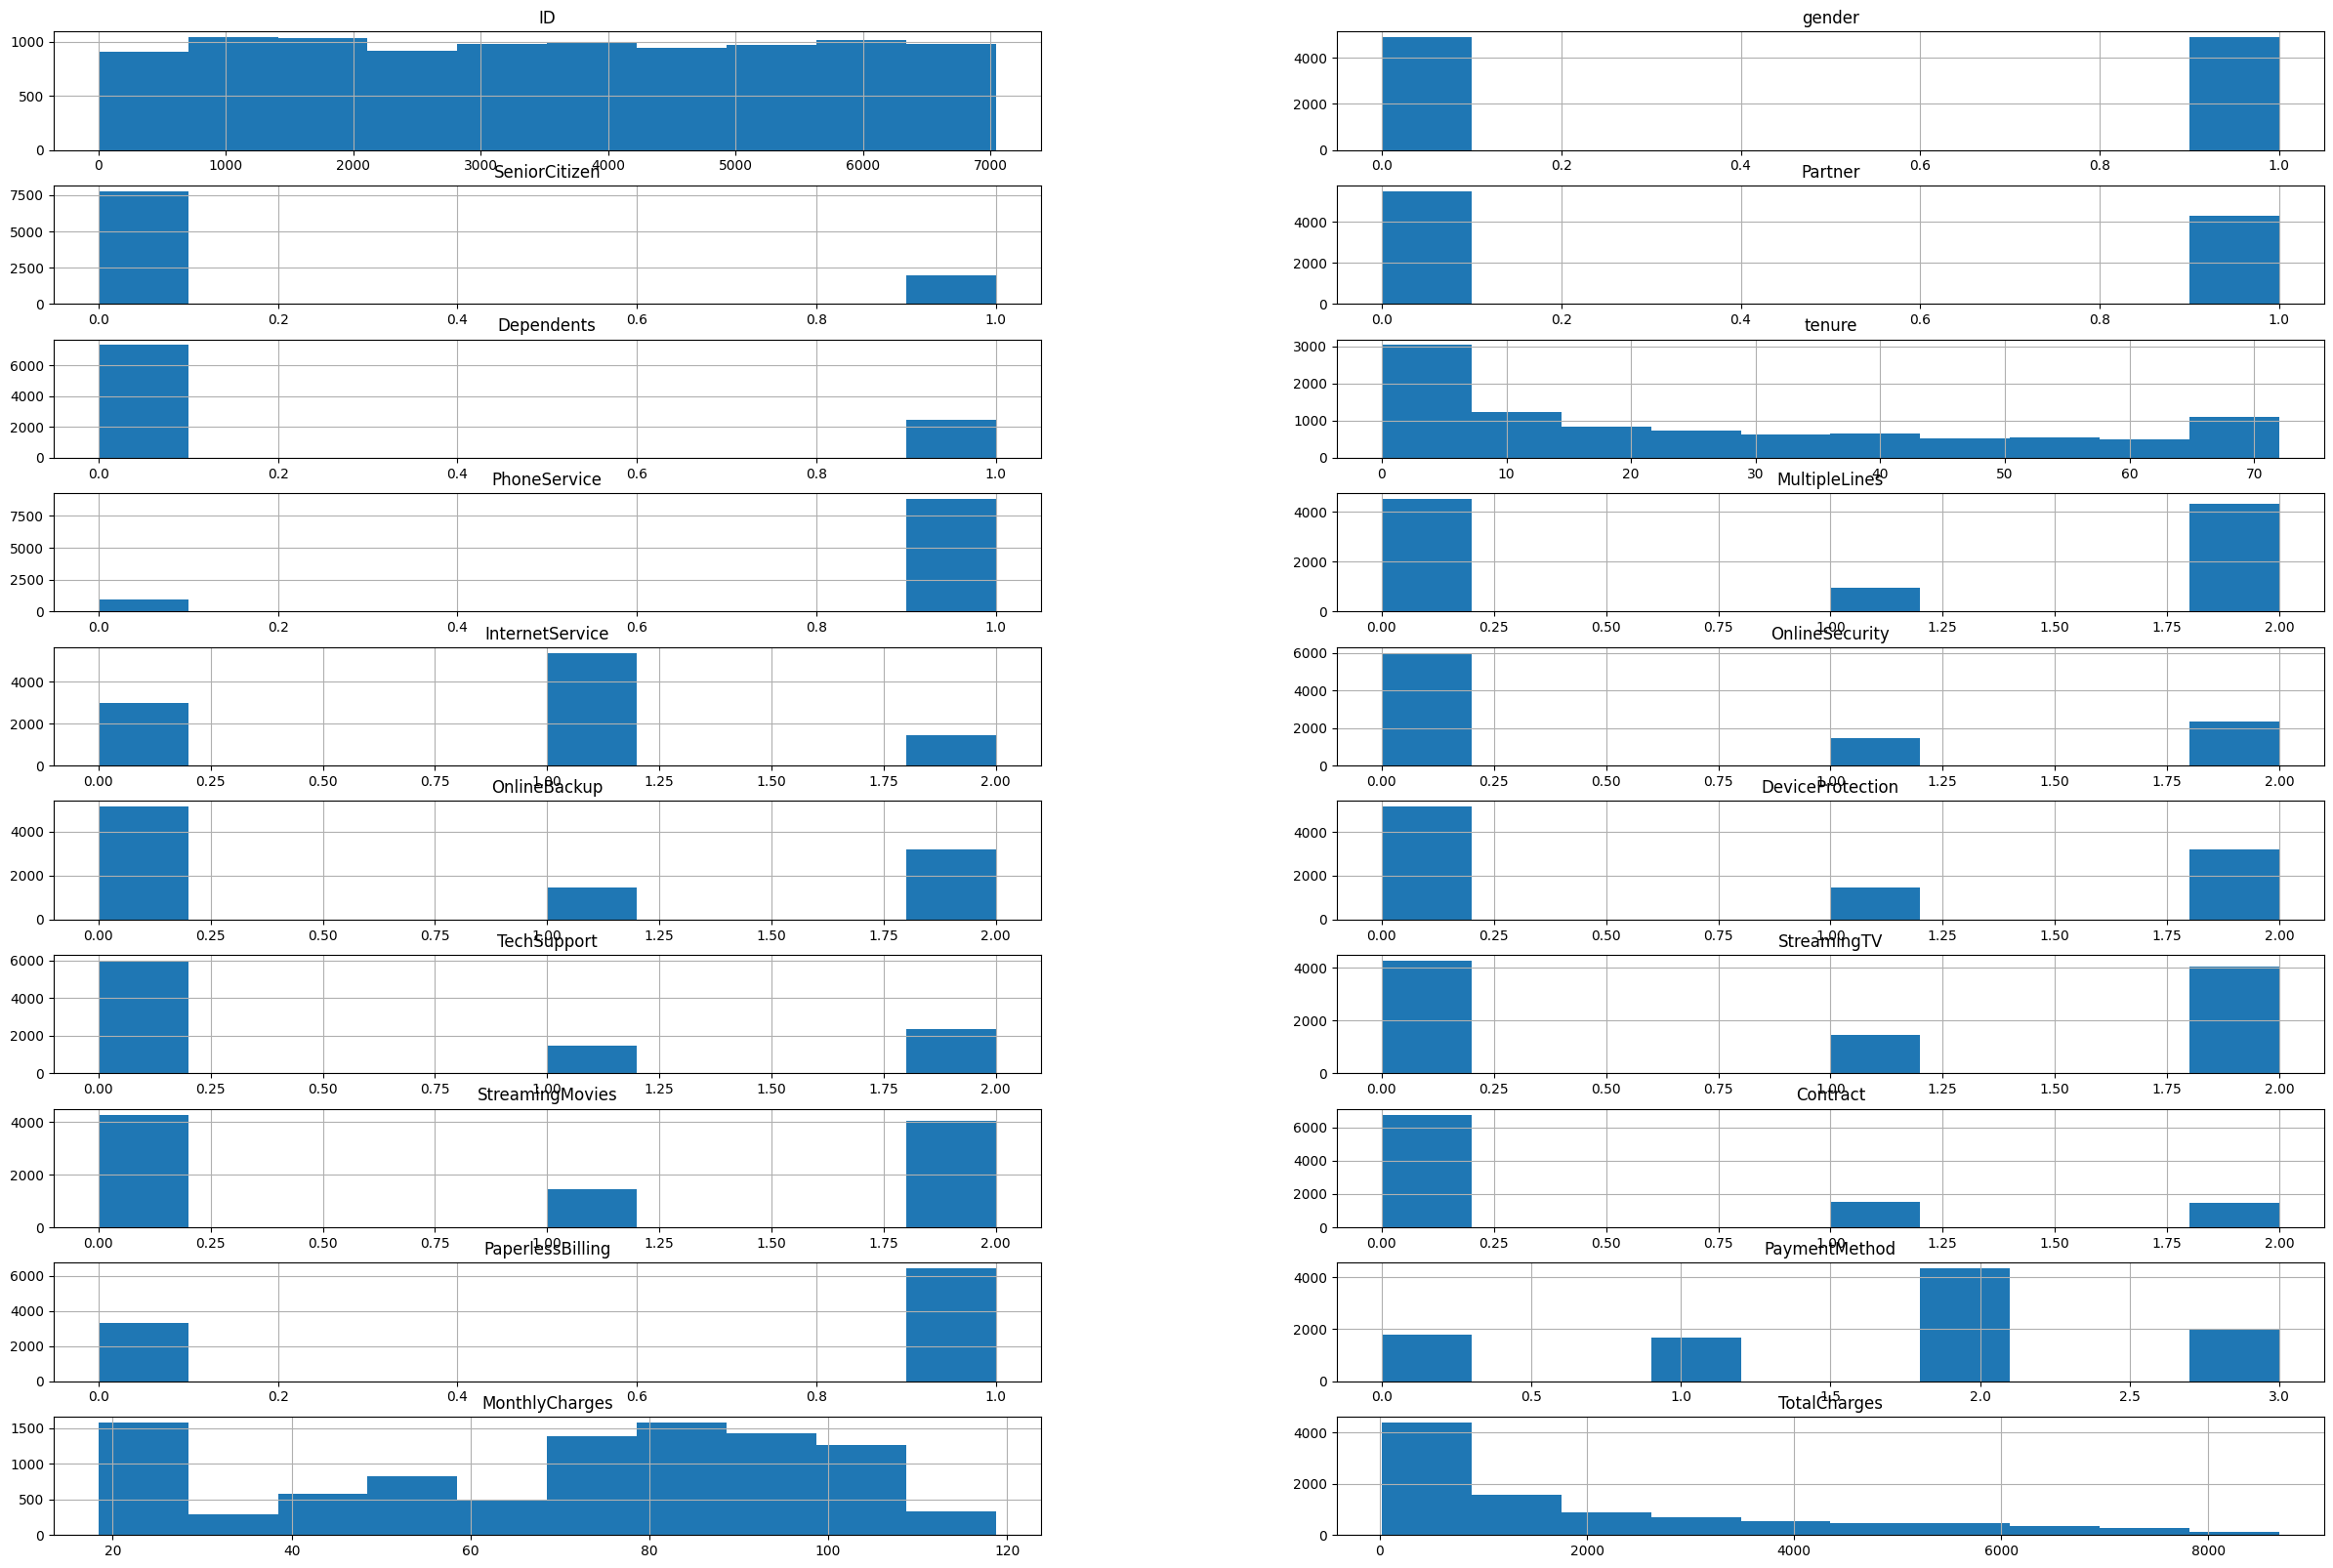

In [19]:
X.hist(figsize=(30,20),layout=(10,2))

#### MonthlyCharges, TotalCharges, and Tenure are all non-normal, with TotalCharges and Tenure being heavily right skewed.  MonthlyCharges looks like it may be relatively normal and a bit left skew, but there is a large count of low charge customers as well.   Its unlikely that a transform will correct any of these, but this will reduce accuracy overall. Nothing stands out which could indicate outliers for this dataset.

In [20]:
Xcorr=pd.concat([y,X])
Xcorr=X
Xcorr.insert(0,"y",y)
CorMat=Xcorr.corr()
CorMat

,y,ID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
y,1.000000,0.017830,-0.007496,0.154493,-0.155296,-0.186895,-0.395504,0.018495,0.048564,-0.061079,...,-0.210287,-0.190528,-0.325098,-0.029235,-0.038387,-0.499351,0.226802,0.141453,0.237520,-0.224196
ID,0.017830,1.000000,0.002025,0.026985,0.013168,0.007984,0.010838,-0.016289,-0.005457,-0.008031,...,0.002448,-0.003105,0.007069,-0.004645,-0.025362,0.009717,0.001225,0.010791,-0.013025,0.008229
gender,-0.007496,0.002025,1.000000,0.011299,0.013291,-0.004670,0.028269,0.000475,0.000822,-0.008404,...,-0.002769,0.010628,-0.022206,-0.011907,-0.023442,0.013634,-0.015923,0.009375,-0.022747,0.022555
SeniorCitizen,0.154493,0.026985,0.011299,1.000000,0.016045,-0.228760,-0.001306,-0.000772,0.140997,-0.018939,...,-0.023102,-0.031671,-0.163180,0.036018,0.049584,-0.151086,0.145616,-0.014639,0.192976,0.064750
Partner,-0.155296,0.013168,0.013291,0.016045,1.000000,0.432476,0.363607,0.008758,0.146483,0.018614,...,0.148954,0.178754,0.117860,0.131081,0.135782,0.270601,-0.020545,-0.150248,0.100973,0.319668
Dependents,-0.186895,0.007984,-0.004670,-0.228760,0.432476,1.000000,0.155731,0.000351,-0.029863,0.036289,...,0.087894,0.092262,0.133923,0.019513,0.007216,0.238750,-0.127157,-0.054087,-0.121741,0.072503
tenure,-0.395504,0.010838,0.028269,-0.001306,0.363607,0.155731,1.000000,0.006162,0.326869,0.004534,...,0.391147,0.378128,0.332865,0.295525,0.312017,0.670319,-0.017865,-0.367964,0.231504,0.868555
PhoneService,0.018495,-0.016289,0.000475,-0.000772,0.008758,0.000351,0.006162,1.000000,-0.007300,0.421836,...,0.007529,0.010720,0.000559,0.056953,0.038318,0.000919,0.037400,-0.017623,0.330782,0.118653
MultipleLines,0.048564,-0.005457,0.000822,0.140997,0.146483,-0.029863,0.326869,-0.007300,1.000000,-0.040261,...,0.119492,0.125236,0.006697,0.189107,0.206341,0.089478,0.166348,-0.163040,0.426573,0.423566
InternetService,-0.061079,-0.008031,-0.008404,-0.018939,0.018614,0.036289,0.004534,0.421836,-0.040261,1.000000,...,0.061286,0.079959,0.006471,0.139234,0.124218,0.086162,-0.075570,0.050920,-0.150818,-0.075162


### Looking at the y column correlation, gender is very low correlation, and PhoneService, MultipleLines, InternetService, StreamingTV, and StreamingMovies are low as well.

In [21]:
X.drop(['y'],inplace=True,axis=1)
X.drop(['gender'],inplace=True,axis=1)

test.drop(['gender'],inplace=True,axis=1)

### Some experimentation was done with dropping columns, in the end only ID, customerID and gender need to be dropped.

In [22]:
#split training dataset into labeled test and training data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [23]:
sc=StandardScaler()
sc.fit(X_train)

#scale the split train/test sets
XTrainScaled=sc.transform(X_train)
XTestScaled=sc.transform(X_test)

#scale the test dataset
testscaled=sc.transform(test)

### Next, principal component analysis will be checked.   If it works, it will provide a dimensionality reduction which may allow better performance.

In [24]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)


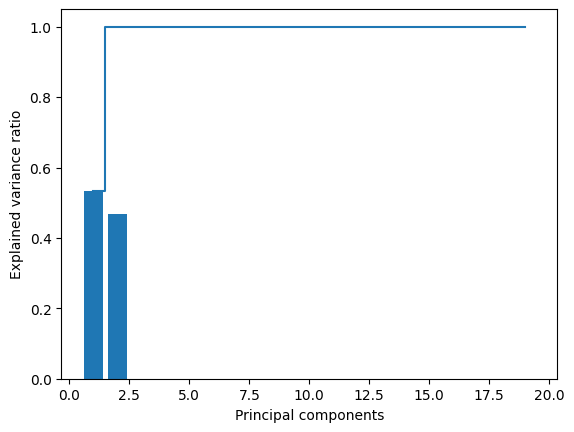

In [25]:
import matplotlib.pyplot as plt

plt.bar(range(1, 20), pca.explained_variance_ratio_, align='center')
plt.step(range(1, 20), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

### It looks like the only two components explain all of the variance. This means that instead of 19 features, 2 can be used with no loss of data. Additionally, they are balanced.   This looks like a promising way to go for getting the highest accuracy possible.

In [26]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
testscaled_pca=pca.transform(testscaled)

LogRes = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
LogRes = LogRes.fit(X_train_pca, y_train)


#Predict then test accuracy of predictions of logistic regression model using split test set
y_pred=LogRes.predict(X_test_pca)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"F1: {f1_score(y_test,y_pred, average='macro')}")

#Predict the target column using the scaled test set
pred=LogRes.predict(testscaled_pca)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'Churn':pred})
out.to_csv('LogResSubmission.csv',index=False)

Accuracy:0.6101637107776262
F1: 0.5594251780592088


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


### LogisticRegression had a poor performance with PCA, even lower than below without it.  where it obtained a .755 F1 score. This may be able to be adjusted using hyperparameter tuning

In [28]:
from sklearn.svm import SVC

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
testscaled_pca=pca.transform(test)


svm=SVC(kernel='rbf',C=1,gamma='auto',random_state=1)
svm.fit(X_train_pca, y_train)


#Predict then test accuracy of predictions of the support vector machine model using split test set
y_pred=svm.predict(X_test_pca)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"F1: {f1_score(y_test,y_pred, average='macro')}")

#Predict the target column using the scaled test set
pred=svm.predict(testscaled_pca)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'Churn':pred})
out.to_csv('SVMSubmissionPCA.csv',index=False)

Accuracy:0.9607776261937244
F1: 0.9602588232825919


In [29]:
from sklearn.ensemble import RandomForestClassifier

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
testscaled_pca=pca.transform(test)


#Create a random forest instance
RandomForest=RandomForestClassifier(n_estimators=128,random_state=1,n_jobs=2,max_features='sqrt',max_depth=16384)

#Fit random forest model
RandomForest.fit(X_train_pca,y_train)

#Predict then test accuracy of predictions of logistic regression model using split test set
y_pred=RandomForest.predict(X_test_pca)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"F1: {f1_score(y_test,y_pred, average='macro')}")

#Predict the target column using the scaled test set
pred=RandomForest.predict(testscaled_pca)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'Churn':pred})
out.to_csv('RandomForestSubmissionPCA.csv',index=False)

Accuracy:0.8414051841746248
F1: 0.8288882404435367


### SVM provided an excellent F1 score of .9602. This will likely be the model selected, assuming it performs this well on the submission.

In [30]:
from sklearn.tree import DecisionTreeClassifier

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
testscaled_pca=pca.transform(testscaled)


#Create a decision tree classifier instance
Tree=DecisionTreeClassifier(criterion='gini',max_depth=160,random_state=1)

#Create a decision tree classifier instance
Tree.fit(X_train_pca, y_train)

#Predict then test accuracy of predictions of logistic regression model using split test set
y_pred=Tree.predict(X_test_pca)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"F1: {f1_score(y_test,y_pred, average='macro')}")

#Predict the target column using the scaled test set
pred=Tree.predict(testscaled_pca)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'Churn':pred})
out.to_csv('TreeSubmission.csv',index=False)

Accuracy:0.8502728512960437
F1: 0.8391503918368275


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [31]:
from sklearn.neighbors import KNeighborsClassifier

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
testscaled_pca=pca.transform(testscaled)

#Create a K nearest neighbors instance
knn=KNeighborsClassifier(n_neighbors=3,p=1,metric='minkowski')

#Fit K nearest neighbors model
knn.fit(X_train_pca,y_train)

#Predict then test accuracy of predictions of logistic regression model using split test set
y_pred=knn.predict(X_test_pca)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"F1: {f1_score(y_test,y_pred, average='macro')}")

#Predict the target column using the scaled test set
pred=knn.predict(testscaled_pca)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'Churn':pred})
out.to_csv('KNNSubmission.csv',index=False)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Accuracy:0.7363574351978172
F1: 0.7110956304927957


#### The principal component analysis method for this dataset appears to work very well, with the SVM model showing an F1 accuracy of .96. However, on submission it scored only a .5 and the random forest provided similar results at a .55322 This likely indicates an overfit condition and PCA will not be used in the final model. Instead, the models will be trained with the core data.

In [32]:
from sklearn.linear_model import Perceptron

#create a perceptron instance
Perceptron=Perceptron(eta0=.01,random_state=1)

#fit scaled training data
Perceptron.fit(XTrainScaled,y_train)

#predict with scaled test data
y_pred=Perceptron.predict(XTestScaled)

#check accuracy of model
print(f"Perceptron Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"F1: {f1_score(y_test,y_pred, average='macro')}")

#Predict the target column using the scaled test set
pred=Perceptron.predict(testscaled)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'Churn':pred})
out.to_csv('PerceptronSubmission.csv',index=False)

Perceptron Accuracy:0.5982264665757162
F1: 0.5951400337213729


In [33]:
from sklearn.linear_model import LogisticRegression

#create a logistic regression instance
LogRes=LogisticRegression(C=1,solver='newton-cg',multi_class='ovr',max_iter=1000,penalty='l2')

#fit logistic regression model
LogRes.fit(XTrainScaled,y_train)

#Predict then test accuracy of predictions of logistic regression model using split test set
y_pred=LogRes.predict(XTestScaled)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"F1: {f1_score(y_test,y_pred, average='macro')}")

#Predict the target column using the scaled test set
pred=LogRes.predict(testscaled)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'Churn':pred})
out.to_csv('LogResSubmission.csv',index=False)

Accuracy:0.7667121418826739
F1: 0.7551932782300277


Logistic Regression provided a respectable score of .74854, very close to the RandomForest model and slightly lower than SVM

In [34]:
from sklearn.svm import SVC

#create a support vector machine instance
svm=SVC(kernel='rbf',C=1,gamma='auto',random_state=1)


#fit support vector machine model
svm.fit(XTrainScaled,y_train)

#Predict then test accuracy of predictions of the support vector machine model using split test set
y_pred=svm.predict(XTestScaled)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"F1: {f1_score(y_test,y_pred, average='macro')}")

#Predict the target column using the scaled test set
pred=svm.predict(testscaled)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'Churn':pred})
out.to_csv('SVMSubmission.csv',index=False)

Accuracy:0.7827421555252387
F1: 0.7724001672435008


#### The SVM provided a submission accuracy of .74915, very close to the random forest model and slightly above LogisticRegression

In [35]:
from sklearn.tree import DecisionTreeClassifier

#Create a decision tree classifier instance
Tree=DecisionTreeClassifier(criterion='gini',max_depth=160,random_state=1)

#Create a decision tree classifier instance
Tree.fit(XTrainScaled,y_train)

#Predict then test accuracy of predictions of logistic regression model using split test set
y_pred=Tree.predict(XTestScaled)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"F1: {f1_score(y_test,y_pred, average='macro')}")

#Predict the target column using the scaled test set
pred=Tree.predict(testscaled)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'Churn':pred})
out.to_csv('TreeSubmission.csv',index=False)

Accuracy:0.8802864938608458
F1: 0.8732893017806295


#### The Decision Tree classifier provided a submission accuracy of .655, lower than the Random Forest model.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

#Create a K nearest neighbors instance
knn=KNeighborsClassifier(n_neighbors=3,p=1,metric='minkowski')

#Fit K nearest neighbors model
knn.fit(XTrainScaled,y_train)

#Predict then test accuracy of predictions of logistic regression model using split test set
y_pred=knn.predict(XTestScaled)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"F1: {f1_score(y_test,y_pred, average='macro')}")

#Predict the target column using the scaled test set
pred=knn.predict(testscaled)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'Churn':pred})
out.to_csv('KNNSubmission.csv',index=False)

Accuracy:0.8148021828103683
F1: 0.8011976272221379


#### The submission accuracy of the KNN model was .69, much lower than the Random Forest.

In [37]:
from sklearn.ensemble import RandomForestClassifier

#Create a random forest instance
RandomForest=RandomForestClassifier(n_estimators=128,random_state=1,n_jobs=2,max_features='sqrt',max_depth=16384)

#Fit random forest model
RandomForest.fit(X_train,y_train)

#Predict then test accuracy of predictions of logistic regression model using split test set
y_pred=RandomForest.predict(X_test)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"F1: {f1_score(y_test,y_pred, average='macro')}")

#Predict the target column using the scaled test set
pred=RandomForest.predict(test)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'Churn':pred})
out.to_csv('RandomForestSubmission.csv',index=False)

Accuracy:0.9027967257844475
F1: 0.8977562587615076


#### Next try the XGBoost ensemble model. We'll setup a grid search to test some different hyperparameters.

In [38]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': range (7, 11), # max depth of decisions in the tree
    'n_estimators': [500,1000], # number of trees in the ensemble model
    'min_child_weight': [1, 5], # min number of instances for each node. the larger the value the more conservative the model
    'subsample': [0.8, 1.0],# % of training data randomly sampled before a new tree growing iteration
    'gamma': [0.5, 2, 5], # cross tree regularization, probably most relevant only if the selected max_depth doesn't produce a very deep tree
    'colsample_bytree': [0.6, 1.0], # % of randomly selected features that are used to train each tree
}

xgbModel = xgb.XGBClassifier(random_state=1)
grid_search = GridSearchCV(
    xgbModel,
    param_grid,
    scoring='f1_macro',
    cv=10,  
    n_jobs=-1,
)
# This takes hours to run so it's commented out now to prevent re-running
# Best parameters found: 
# {'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.8}
# f1: 0.916622805928499

# grid_search.fit(X, y)
# print("XGBoost tuning")
# print(f"Best score: {grid_search.best_score_}")
# print(grid_search.best_params_)

In [39]:
import xgboost as xgb
xgbModel = xgb.XGBClassifier(random_state=1, max_depth=10, n_estimators=1000, min_child_weight=1, subsample=0.8, colsample_bytree=0.6, gamma=0.5)
xgbModel.fit(X,y)

#Predict the target column using the original test set
#testx = test.drop(['customerID'], axis=1)
pred=xgbModel.predict(test)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'Churn':pred})
out.to_csv('XGBSubmission.csv',index=False)

### Even with tuning, the random forest is providing a best F1 score of .8978, which is lower than the .9603 from SVM. On working with submission testing, the Random Forest classifier provided the best AUC of .76252 of all models tested.

In [40]:
from sklearn.ensemble import VotingClassifier

clf2=RandomForestClassifier(n_estimators=128,random_state=1,n_jobs=2,max_features='sqrt',max_depth=16384)
clf3=SVC(kernel='rbf',C=1,gamma='auto',random_state=1,probability=True)


eclf1=VotingClassifier(estimators=[('rf',clf2),('sv',clf3)],voting='soft')
eclf1=eclf1.fit(XTrainScaled,y_train)

#Predict then test accuracy of predictions of logistic regression model using split test set
y_pred=eclf1.predict(XTestScaled)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"F1: {f1_score(y_test,y_pred, average='macro')}")

#Predict the target column using the scaled test set
pred=eclf1.predict(testscaled)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'Churn':pred})
out.to_csv('Voter.csv',index=False)

Accuracy:0.8625511596180082
F1: 0.8538087369866014


### The voting classifier provided a submission score of .75993 when using soft voting and only the support vector machine and random forest models. This is close to an average between SVM and RF models and did not improve performance.

In [41]:
from sklearn.model_selection import RandomizedSearchCV
rf_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]
}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rf_grid, 
                               n_iter = 100, cv = 10, random_state=1, 
                               n_jobs = -1, scoring='f1_macro')
# Fit the random search model
rf_random.fit(X, y)

print("RF tuning")
print(f"Best score: {rf_random.best_score_}")
print(rf_random.best_params_)
best_params = rf_random.best_params_

# best_params={'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 
#              'max_depth': 30, 'bootstrap': False}

RF tuning
Best score: 0.9445216996291805
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': False}


In [42]:

RandomForest=RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                    min_samples_split=best_params['min_samples_split'],
                                    min_samples_leaf=best_params['min_samples_leaf'],
                                    max_depth=best_params['max_depth'],
                                    bootstrap=best_params['bootstrap'],
                                    random_state=1,n_jobs=-1)

#Fit random forest model using the entire training dataset
RandomForest.fit(X,y)

#Predict the target column using the scaled test set
pred=RandomForest.predict(test)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'Churn':pred})
out.to_csv('RandomForest-tunedSubmission.csv',index=False)


### Since RF worked so well, let's see what the most important features were. This may help with model understandability.

In [43]:
# Use the random forest model's important features to find the most
# important features, and drop the rest
important_features = RandomForest.feature_importances_
indices = np.argsort(important_features)[::-1]
ranked_features = pd.DataFrame()
features = X_train.columns
top_features=[]
top_features_importance=[]

# print a table of info about each feature in the training set
# and make a list of top features and their importances
for f in range(X_train.shape[1]): 
    top_features.append(features[indices[f]])
    top_features_importance.append(important_features[indices[f]])
    print("%2d %-*s %f" % (f + 1, 45, features[indices[f]], 
                           important_features[indices[f]]))

top_features_df = pd.DataFrame({'feature':top_features,
                                'importance':top_features_importance})

 1 TotalCharges                                  0.145396
 2 MonthlyCharges                                0.141841
 3 tenure                                        0.131231
 4 ID                                            0.124866
 5 Contract                                      0.120987
 6 TechSupport                                   0.052034
 7 OnlineSecurity                                0.046684
 8 PaymentMethod                                 0.044595
 9 InternetService                               0.034987
10 OnlineBackup                                  0.022256
11 PaperlessBilling                              0.020232
12 DeviceProtection                              0.018598
13 Partner                                       0.017187
14 MultipleLines                                 0.016971
15 Dependents                                    0.015613
16 StreamingMovies                               0.014305
17 SeniorCitizen                                 0.014180
18 StreamingTV